In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

RANDOM = 427
SPLIT_RATE = 0.3

TRAIN_DATA_FILE = 'train.csv'
TEST_DATA_FILE = 'test.csv'

##### load data

In [2]:
data_train = pd.read_csv(TRAIN_DATA_FILE)
data_test = pd.read_csv(TEST_DATA_FILE)

predicts = list(data_train.columns[:-1])

target = data_train.columns[-1]

X = data_train[predicts]
y = data_train[target]

X_test = data_test

##### split data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=SPLIT_RATE, random_state=RANDOM)

##### init prepare data

Подготовим данные для базовой оценки

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7573 to 5410
Data columns (total 19 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5544 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3665 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,7000.000000,7000.000000,7000.000000,7000.000000,5544.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,3665.000000,7000.000000,7000.000000
mean,8385.493429,50.687286,1.893857,56.205197,36.249696,6.482429,8.485286,12.587286,4.849409e+03,0.119380,24.572429,5306.521714,8.123000,1143.267394,1.331714,4.214000
std,4846.222527,43.717704,0.849778,20.284347,18.234259,33.996835,5.239792,6.778839,2.396436e+05,0.119603,17.380471,3952.878964,23.909773,1012.890851,1.503140,4.785101
min,2.000000,0.000000,0.000000,1.988943,0.370619,0.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000
25%,4188.500000,20.000000,1.000000,41.799966,22.876491,1.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8369.500000,37.000000,2.000000,52.473672,32.898387,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12572.250000,75.000000,2.000000,65.925548,45.128052,9.000000,12.000000,17.000000,2.001000e+03,0.195781,35.000000,7077.000000,5.000000,1548.000000,2.000000,5.000000
max,16798.000000,208.000000,19.000000,604.705972,263.542020,2014.000000,42.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [6]:
X_train.describe(include=['object'])

,Ecology_2,Ecology_3,Shops_2
count,7000,7000,7000
unique,2,2,2
top,B,B,B
freq,6921,6804,6430


In [7]:
for col in X_train.describe(include=['object']).columns:
    print(col + '\t', end='')
    print(X_train[col].unique())

Ecology_2	['B' 'A']
Ecology_3	['B' 'A']
Shops_2	['B' 'A']


Убираем столбцы с пропущенными данными и столбец Id

In [8]:
X_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [9]:
feats = [
#     'Id',
    'DistrictId',
    'Rooms',
    'Square',
#     'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'HouseYear',
    'Ecology_1',
    'Ecology_2',
    'Ecology_3',
    'Social_1',
    'Social_2',
    'Social_3',
#     'Healthcare_1',
    'Helthcare_2',
    'Shops_1',
    'Shops_2'
]

Преобразуем категориальные признаки

In [10]:
def prepare_category(df):
    ''' Преобразует признаки Ecology_2, Ecology_3, Shops_2 к числовому типу.
        Заменяет 'A' на 0, 'B' на 1.
    '''
    df_new = df.copy()
    col_list = ['Ecology_2', 'Ecology_3', 'Shops_2']
    for col in col_list:
        df_new[col] = df[col].map({'A': 0, 'B': 1})
    return df_new

In [11]:
X_train = prepare_category(X_train)

X_valid = prepare_category(X_valid)

##### init model

In [67]:
from sklearn.ensemble import RandomForestRegressor as RF

model = RF(n_estimators=100, 
           max_depth=14,
           random_state=RANDOM)

In [68]:
model.fit(X_train[feats], y_train)

y_pred = model.predict(X_valid[feats])
y_pred_train = model.predict(X_train[feats])

In [69]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

init_r2 = r2(y_valid, y_pred)
init_mse = mse(y_valid, y_pred)

init_r2_train = r2(y_train, y_pred_train)
init_mse_train = mse(y_train, y_pred_train)

In [70]:
init_r2, init_mse

(0.7262964689996777, 2312511273.762625)

In [71]:
init_r2_train, init_mse_train

(0.9318314988882865, 593037592.352157)

In [64]:
from sklearn.model_selection import GridSearchCV

params = [{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}]

cv = GridSearchCV(estimator=RF(n_estimators=100, random_state=RANDOM),
                  param_grid=params,
                  scoring='r2',
                  cv=3)

cv.fit(X_train[feats], y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=427, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [65]:
cv.best_params_

{'max_depth': 14}

In [66]:
cv.best_score_

0.7154607686379384

##### data analysis

In [17]:
pd.DataFrame(model.feature_importances_,
             columns=['Importance'],
             index=feats).sort_values(by='Importance', ascending=False)

,Importance
Square,0.396194
Social_2,0.121263
Rooms,0.080385
Social_1,0.076668
Social_3,0.058654
DistrictId,0.051333
HouseYear,0.045154
Ecology_1,0.042717
Floor,0.037010
KitchenSquare,0.029790


In [18]:
data = pd.merge(X_train, pd.DataFrame(y_train), left_index=True, right_index=True)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,7000.0,8385.493429,4846.222527,2.000000,4188.500000,8369.500000,12572.250000,1.679800e+04
DistrictId,7000.0,50.687286,43.717704,0.000000,20.000000,37.000000,75.000000,2.080000e+02
Rooms,7000.0,1.893857,0.849778,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,7000.0,56.205197,20.284347,1.988943,41.799966,52.473672,65.925548,6.047060e+02
LifeSquare,5544.0,36.249696,18.234259,0.370619,22.876491,32.898387,45.128052,2.635420e+02
KitchenSquare,7000.0,6.482429,33.996835,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,7000.0,8.485286,5.239792,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,7000.0,12.587286,6.778839,0.000000,9.000000,12.000000,17.000000,9.900000e+01
HouseYear,7000.0,4849.409286,239643.648862,1912.000000,1973.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,7000.0,0.119380,0.119603,0.000000,0.017647,0.075779,0.195781,5.218671e-01


###### Square

In [20]:
data['Square'].describe()

count    7000.000000
mean       56.205197
std        20.284347
min         1.988943
25%        41.799966
50%        52.473672
75%        65.925548
max       604.705972
Name: Square, dtype: float64

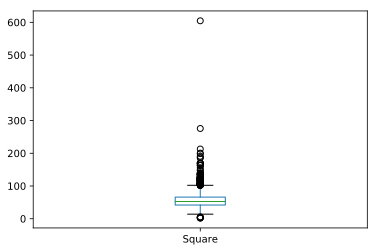

In [21]:
data['Square'].plot(kind='box')

In [22]:
data.loc[X_train['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,1,1,9,1892,0,NaN,0,1,1,302211.260887
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,1,1,53,14892,4,NaN,1,4,1,528560.506016
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,1,1,25,5648,1,30.0,2,4,1,187717.242538
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,1,0,31,7010,5,4508.0,3,7,1,455264.882666


Площадь квартиры 28 скорее всего в 10 раз меньше.

In [23]:
X_train.loc[X_train['Id'] == 28, 'Square'] = X_train.loc[X_train['Id'] == 28, 'Square'] / 10

In [24]:
data['PricePerSq'] = data['Price'] / data['Square']

In [25]:
data['PricePerSq'].describe()

count      7000.000000
mean       3976.106006
std        3672.301050
min         310.427301
25%        2914.807447
50%        3902.007059
75%        4696.992534
max      230463.537966
Name: PricePerSq, dtype: float64

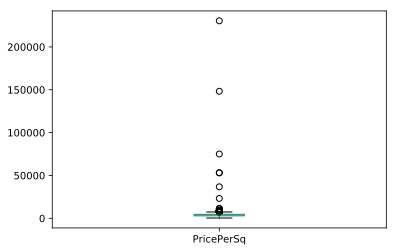

In [26]:
data['PricePerSq'].plot(kind='box')

In [32]:
data.loc[(data['PricePerSq'] > 20000)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerSq
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,1,5,1564,0,540.0,0,0,1,137597.601458,52996.529388
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,...,1,53,13670,4,NaN,1,11,1,458378.777006,230463.537966
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,1,23,5212,6,NaN,3,2,1,438005.182323,148259.792432
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,1,2,469,0,NaN,0,0,1,126596.941798,53253.578837
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,1,9,1892,0,NaN,0,1,1,161379.067034,36757.837204
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,1,4,915,0,NaN,0,0,1,107604.269441,23223.115671
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,...,1,43,8429,3,NaN,3,9,1,412511.088764,75042.110444


In [30]:
data.loc[X_train['Square'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerSq
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,1,5,1564,0,540.0,0,0,1,137597.601458,52996.529388
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,...,1,53,13670,4,NaN,1,11,1,458378.777006,230463.537966
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,1,23,5212,6,NaN,3,2,1,438005.182323,148259.792432
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,1,2,469,0,NaN,0,0,1,126596.941798,53253.578837
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,1,9,1892,0,NaN,0,1,1,161379.067034,36757.837204
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,1,4,915,0,NaN,0,0,1,107604.269441,23223.115671
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,...,1,43,8429,3,NaN,3,9,1,412511.088764,75042.110444


##### feature engineering